<a href="https://colab.research.google.com/github/kbd95/Telecom-Churn-Prediction/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom Customer Churn Prediction#

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style="white")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting columns in the required datatype format before moving forward. As “TotalCharges” column is defined as object which is originally a numerical column.

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors = "coerce")

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Passed a dictionary to astype() function

In [8]:
df = df.astype({"customerID":"category","gender":"category","SeniorCitizen":"category","Partner":"category","Dependents":"category","tenure":"float64","PhoneService":"category","MultipleLines":"category","InternetService":"category","OnlineSecurity":"category","OnlineBackup":"category","DeviceProtection":"category","TechSupport":"category","StreamingTV":"category","StreamingMovies":"category","Contract":"category","PaperlessBilling":"category","PaymentMethod":"category","MonthlyCharges":"float64"})

Check missing values

In [9]:
# Percentage of null values
df.isnull().sum()*100/len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Now missing values are present in the dataset are very small. There are only 0.15% missing values are present in Total charges. So we can fill it with simple mean imputation our data set

In [10]:
# Fill missing values with mean column values

df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)

##Exploratory Data Analysis##

###Class Distribution of Target Variable###

In [11]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

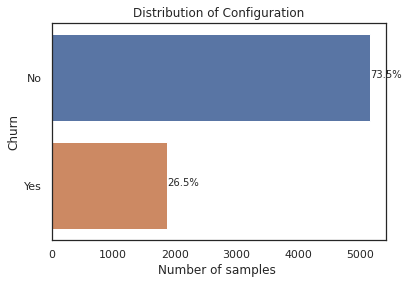

In [12]:
def BarPlot(df,column):
  ax = sns.countplot(y=column,data=df)
  plt.title("Distribution of Configuration")
  plt.xlabel("Number of samples ")
  

  total = len(df[column])

  for i in ax.patches:
    percentage = "{:.1f}%".format(100*i.get_width()/total)

    x = i.get_x() + i.get_width() + 0.02
    y = i.get_y() + i.get_height()/2
    ax.annotate(percentage,(x,y))

  plt.show()

BarPlot(df,"Churn")


#Numerical features###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

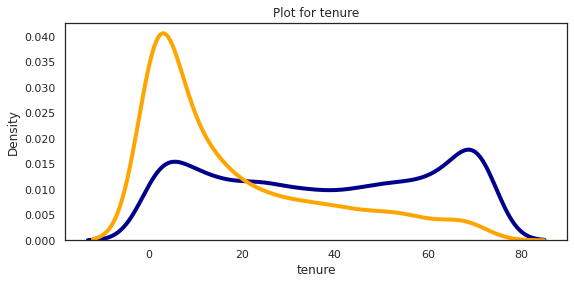

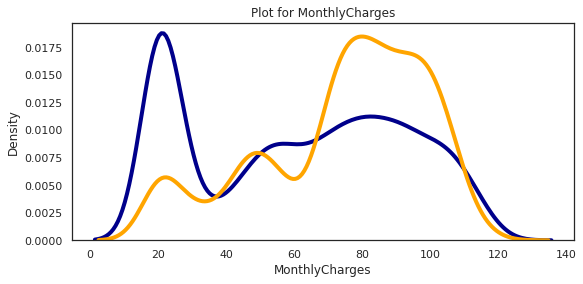

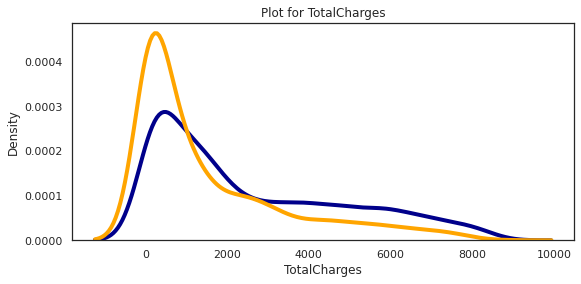

In [13]:
def distplot(col, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(col))
    ax0 = sns.distplot(df[df['Churn'] == 'No']
                       [col].dropna(), hist=hist, kde=kde,
                       color = 'darkblue',label= 'Churn: No',
                       hist_kws={'edgecolor':'black'},
                       kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes']
                       [col].dropna(), hist=hist, kde=kde, 
                       color = 'orange',  label= 'Churn: Yes',
                       hist_kws={'edgecolor':'black'},
                       kde_kws={'linewidth': 4})

distplot('tenure', hist = False, kde = True)
distplot('MonthlyCharges', hist = False, kde = True)
distplot('TotalCharges', hist = False, kde = True)

The above plot clearly says that ---

New users are more likely to churn

The customer with higher monthly charged is more likely to churn

In total charges both have approx same property



##Feature generation##

Feature Generation that can b done by the difference between the MonthlyCharges and the TotalCharges divided by the tenure:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


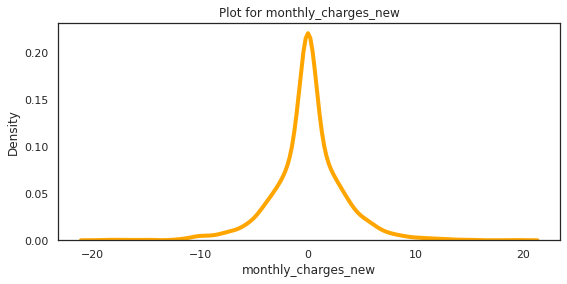

In [14]:
df['total_to_tenure_ratio'] = df['TotalCharges']/df['tenure']
df['monthly_charges_new'] = df['MonthlyCharges'] - df['total_to_tenure_ratio']
distplot('monthly_charges_new',hist=False,kde=True)

#Categorical features###
This dataset has 16 categorical features:

Six binary features (Yes/No)

Nine features with three unique values each (categories)

One feature with four unique values


###Binary Features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


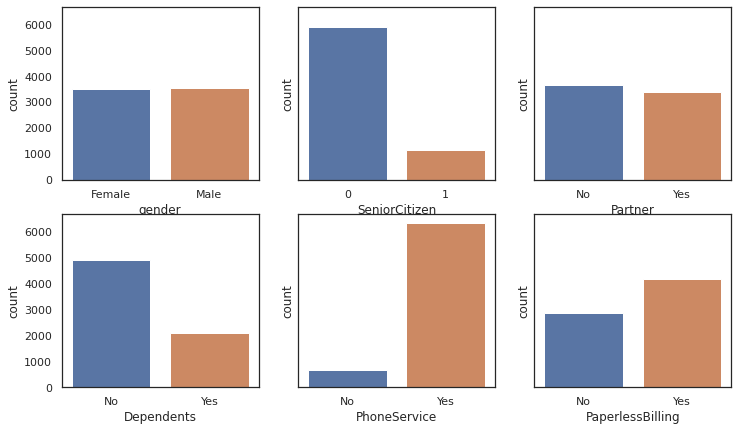

In [15]:
fig,axes = plt.subplots(2,3,figsize=(12,7),sharey=True)
sns.countplot("gender",data=df,ax=axes[0,0])
sns.countplot("SeniorCitizen",data=df,ax=axes[0,1])
sns.countplot("Partner",data=df,ax=axes[0,2])
sns.countplot("Dependents",data=df,ax=axes[1,0])
sns.countplot("PhoneService",data=df,ax=axes[1,1])
sns.countplot("PaperlessBilling",data=df,ax=axes[1,2])

About 50% of members in our dataset are male while other about 50% are female

Most of the customers in the dataset are younger people

About 50% of the customers have partners

About 30% of the total customers hgave dependents

About 90% customers have phone service

About 60% of customers make paperless billing

In [16]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [17]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [18]:
4171/7043*100

59.22192247621753

###Partner and Dependent

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


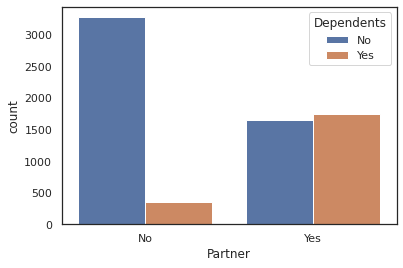

In [19]:
sns.countplot("Partner",data=df,hue = "Dependents")

The customer who has opartner is more likely to dependents

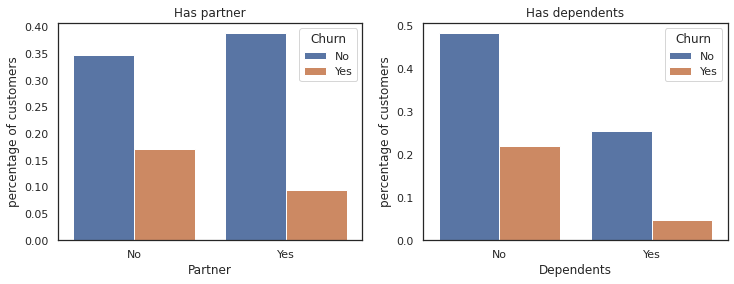

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

The customers that dont have a partners are more likely to churn

The customers who is not dependents are more likely to churn

###Seniorcitizen and Dependents

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


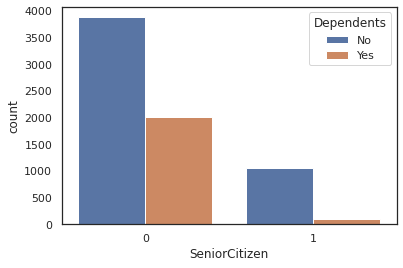

In [21]:
sns.countplot("SeniorCitizen",data=df, hue = "Dependents")

The most of senior citizern customner is not dependent

###Phone and Internet Service

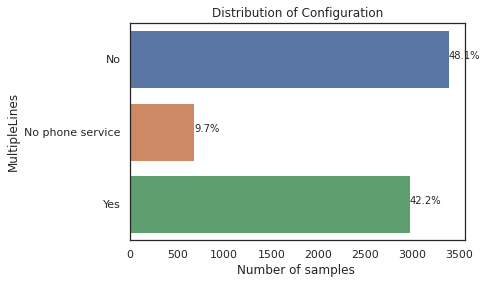

In [22]:
BarPlot(df,"MultipleLines")

Only 9.7% cvustomers have phoner service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


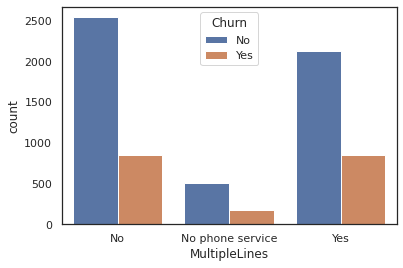

In [23]:
sns.countplot("MultipleLines",data = df,hue = "Churn")

Approx same churn rate on between No multipleline and yes multiplelines

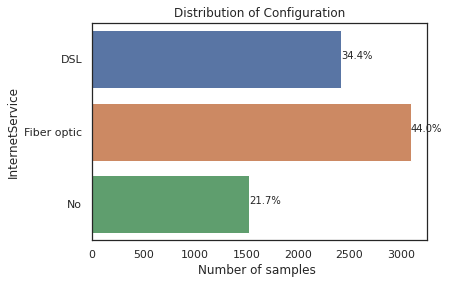

In [24]:
BarPlot(df,"InternetService")

The fiber optic customer is more t6han rest of other

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


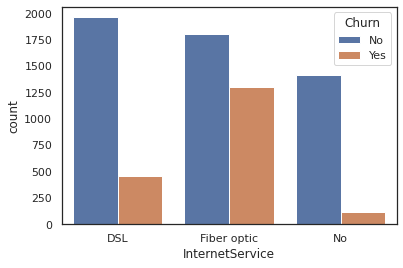

In [25]:
sns.countplot("InternetService",data=df,hue = "Churn")

Customers with fiber optic is more probabale to churn

### Internet Service
OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies are six additional services for customers with the internet

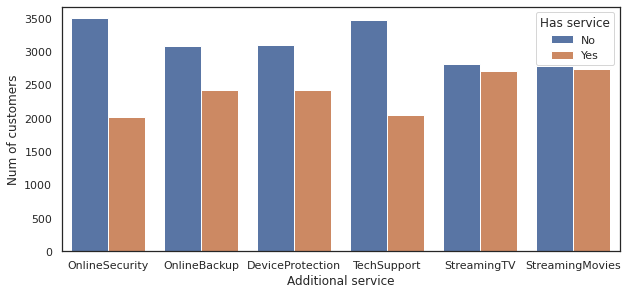

In [26]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

The Customers with OnlineSecurity, Onlinebackup, DeviceProtection, Techsupport are more unlikely to churn

Streaming service is not predictive for churn



###Payment Method

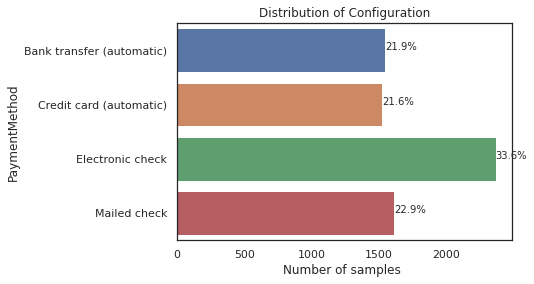

In [27]:
BarPlot(df, "PaymentMethod")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


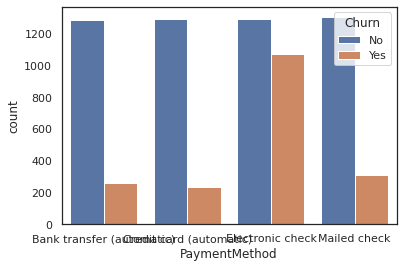

In [28]:
sns.countplot("PaymentMethod", data=df, hue = 'Churn')

Electronic Check is the Largest Payment method

Electronic Check has most churn in Payment Method

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_to_tenure_ratio,monthly_charges_new
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0.000000
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,1.376471
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,-0.225000
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,1.394444
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,-5.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,82.937500,1.862500
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,102.262500,0.937500
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,31.495455,-1.895455
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,76.650000,-2.250000


In [30]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'total_to_tenure_ratio', 'monthly_charges_new'],axis=1, inplace=True)


<Figure size 864x432 with 0 Axes>

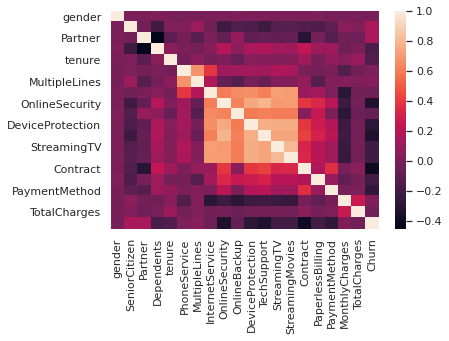

In [31]:
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr())#, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.2, cmap="YlGnBu")

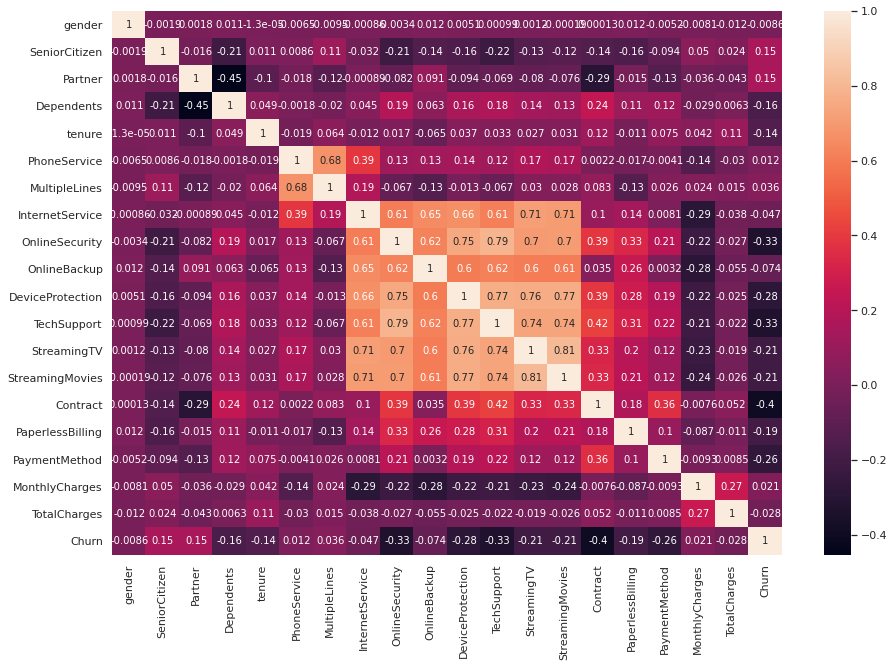

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

###Feature Importance

In [33]:

# One-hot encode
df = pd.get_dummies(df)

# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']

x, y = df.drop(drop,axis=1), df['Churn_Yes']        

In [34]:
# Fit RandomForest Classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params)
clf = clf.fit(x,y)

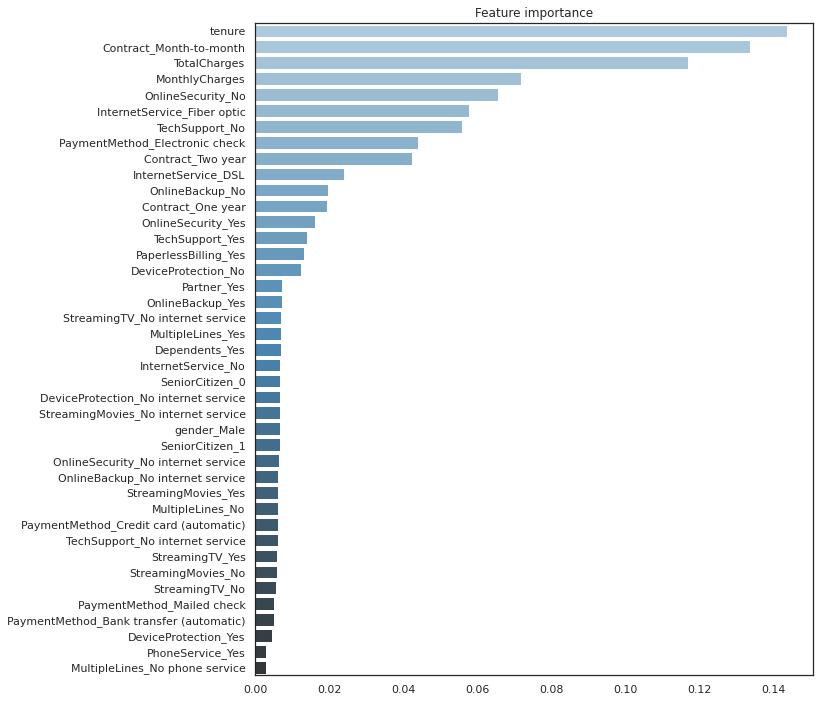

In [35]:
#Plot Feature Importance
imp_feat = pd.Series(data=clf.feature_importances_,index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp_feat.index, x=imp_feat.values, palette="Blues_d", orient='h')

In [36]:
y.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

SMOTE for Data balancing 

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =0)
X_resample,y_resample = sm.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [58]:
unique, counts = np.unique(y_resample, return_counts=True)
unique,counts

(array([0, 1], dtype=uint8), array([5174, 5174]))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.2, random_state=42)

# Model 

##GradientBoost

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4153
           1       0.88      0.86      0.87      4125

    accuracy                           0.87      8278
   macro avg       0.87      0.87      0.87      8278
weighted avg       0.87      0.87      0.87      8278



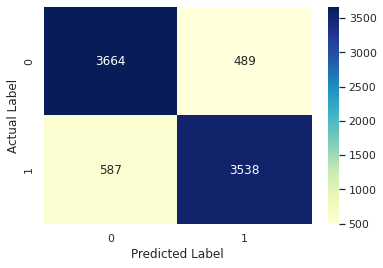

In [76]:
#Model prediction on training dataset

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_train,y_pred))

##Evaluation

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1021
           1       0.87      0.86      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



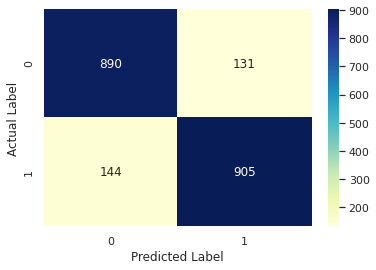

In [79]:
# Model prediction on test data
pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test,pred))